## Importing libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Reading the Data Set in a dataframe df and computing the percent change from year 2008 to 2009 and classification of increased/positive funding as 1 and decreased/negative funding as 0.

In [2]:
df = pd.read_excel('2010 Federal STEM Education Inventory Data Set.xls', header=1)
year_08 = df.iloc[:,6]
year_09 = df.iloc[:,7]
result = year_09 - year_08
PosNeg = []
for i in range(len(result)):
    if (year_08[i]==0 and year_09[i]!=0) or (math.isnan(year_08[i]) and math.isnan(year_09[i])==False):
        result[i] = 100
    elif (year_08[i]==0 and year_09[i]==0) or (math.isnan(year_08[i]) and math.isnan(year_09[i])):   
        result[i] = 0
    else:
        result[i] = (result[i]/year_08[i])*100
    if result[i]>=0:
        PosNeg.append(1)
    else:
        PosNeg.append(0)
              
df.insert(8,"Percent Change",result)
df.insert(9,"y",PosNeg)

## Visualisation of each Program/Investment with respect to the percentage change of funding

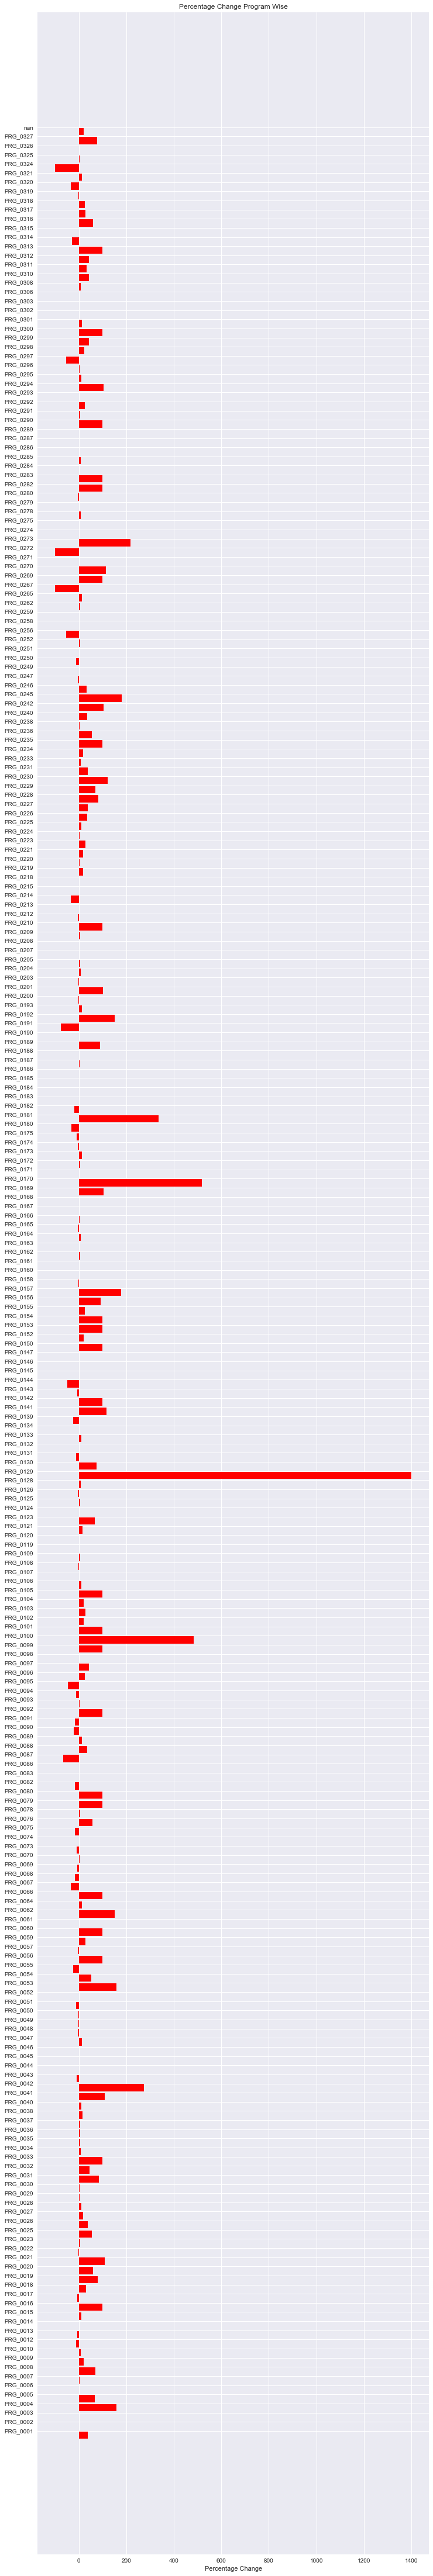

In [58]:
ind = np.arange(len(df['Investment Name']))
width = 0.9
fig, ax = plt.subplots(figsize=(12,80))
rects = ax.barh(ind, np.array( df["Percent Change"]), color='r',align = 'center')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(df['Index Number'], rotation='horizontal')
ax.set_xlabel("Percentage Change")
ax.set_title("Percentage Change Program Wise")
#autolabel(rects)
plt.show()

## Visualising funding of various Agencies where Zero count refers to negative funding and One count refers to positive funding

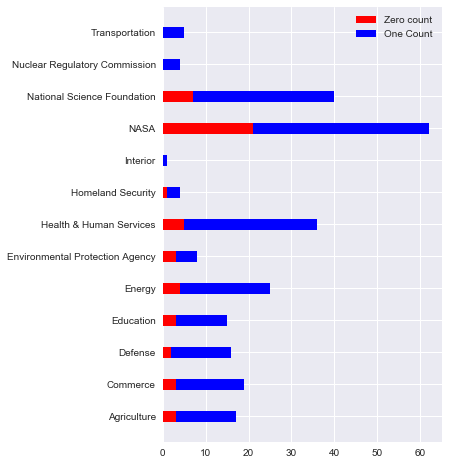

In [4]:
# Visualising funding of various Agencies where Zero count refers to negative funding 
# and One count refers to positive funding

agency_names=[]
agency_zero_count=[]
agency_one_count=[]
for name,group in df.groupby(['Agency'])['y']:
    agency_zero_count.append(len(group)-sum(group))
    agency_one_count.append(sum(group))
    agency_names.append(name)

N = len(agency_names)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(5,8))
p1 = plt.barh(ind, agency_zero_count, width, color='red')
p2 = plt.barh(ind, agency_one_count, width, left=agency_zero_count, color="blue")
plt.yticks(ind, agency_names)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

## Visualising funding alotted to the different programs with respect to their year of establishment.

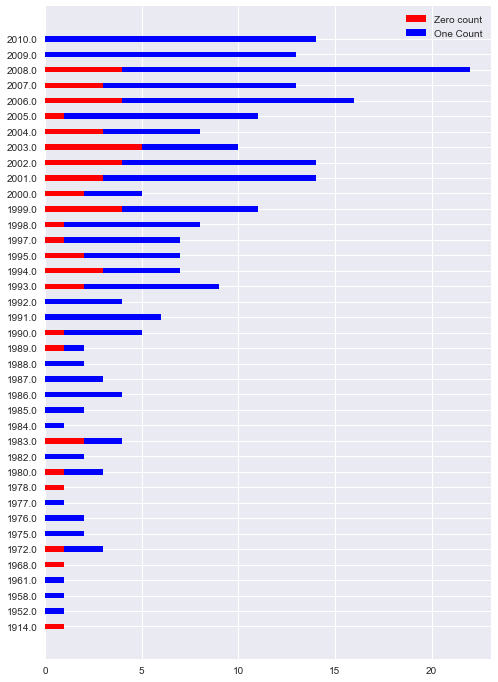

In [6]:
# Visualising funding alotted to the different programs with respect to their year of establishment.

year_names =[]
year_zero_count=[]
year_one_count=[]
for name,group in df.groupby(['B) Year Established'])['y']:
    year_zero_count.append(len(group)-sum(group))
    year_one_count.append(sum(group))
    year_names.append(name)

N = len(year_names)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(8,12))
p1 = plt.barh(ind, year_zero_count, width, color='red')
p2 = plt.barh(ind, year_one_count, width, left=year_zero_count, color="blue")
plt.yticks(ind, year_names)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

## Visualising funding increment or decrement in terms of Agency or Mission-Related Workforce Needs

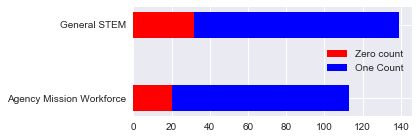

In [7]:
year_names =[]
year_zero_count=[]
year_one_count=[]
for name,group in df.groupby(['D) Mission-specific or General STEM?'])['y']:
    year_zero_count.append(len(group)-sum(group))
    year_one_count.append(sum(group))
    year_names.append(name)

N = len(year_names)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(5,2))
p1 = plt.barh(ind, year_zero_count, width, color='red')

p2 = plt.barh(ind, year_one_count, width, left=year_zero_count, color="blue")
plt.yticks(ind, year_names)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

## Function for bar plot 

In [8]:
def plot_bar_x(label,Y,xlabel,ylabel,title):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.figure(figsize=(10,5))
    plt.bar(index, Y)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(index, label, fontsize=7, rotation=30)
    plt.title(title)
    plt.show()

## Analysing all other features in the dataset which contributes towards funding.

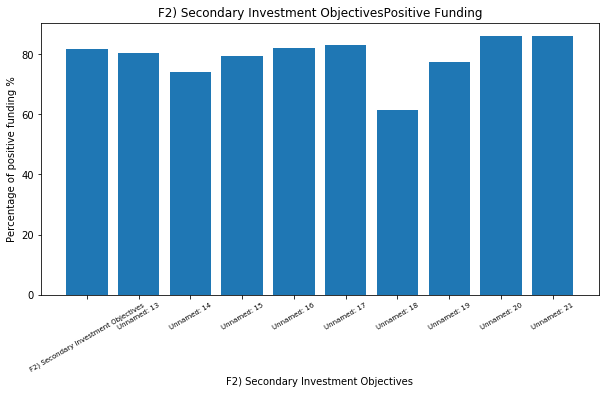

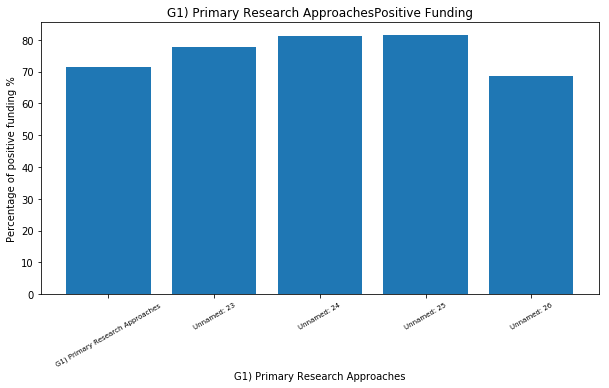

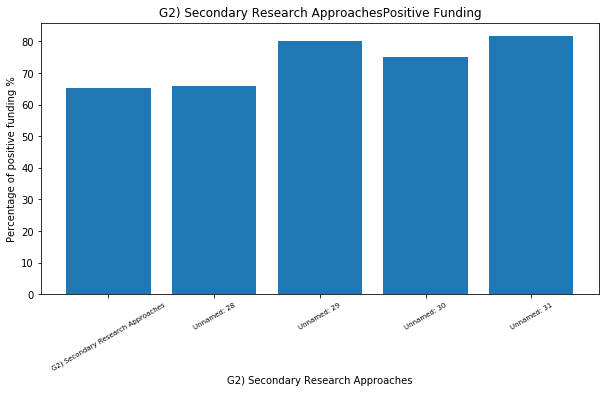

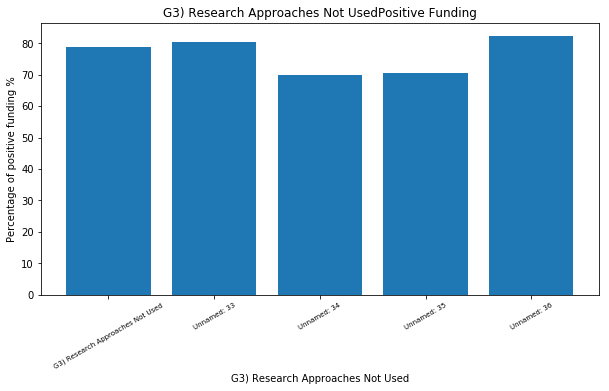

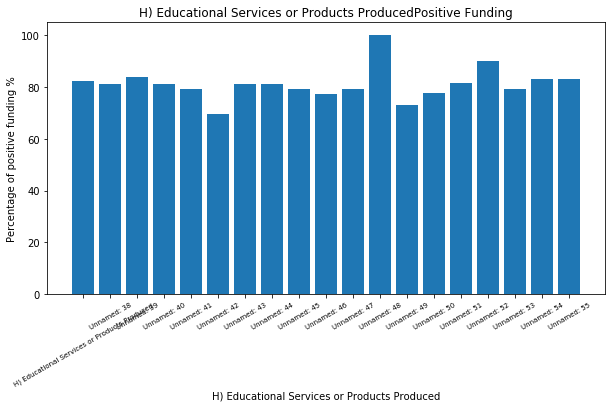

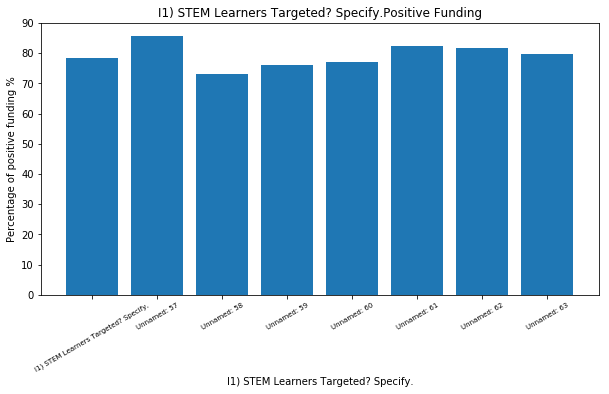

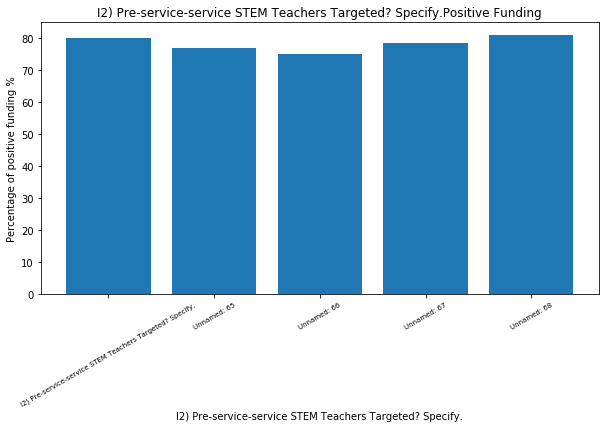

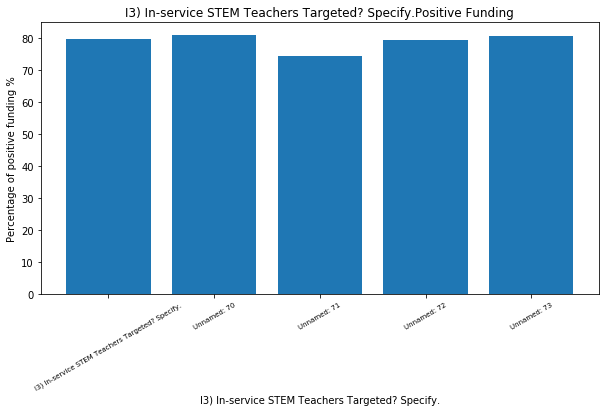

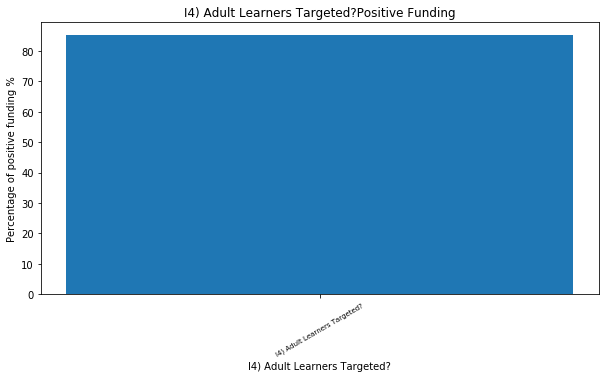

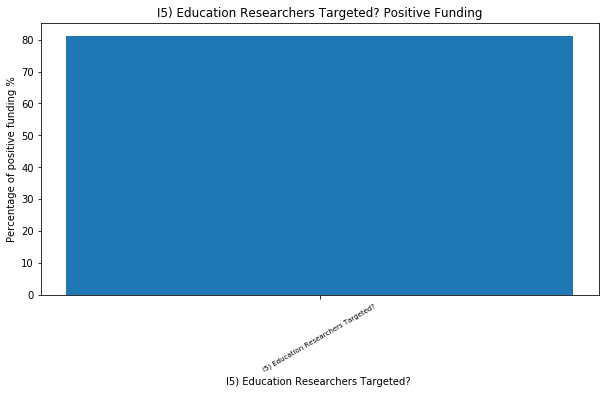

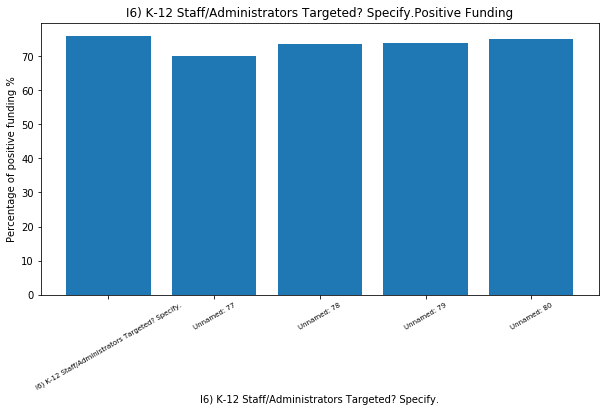

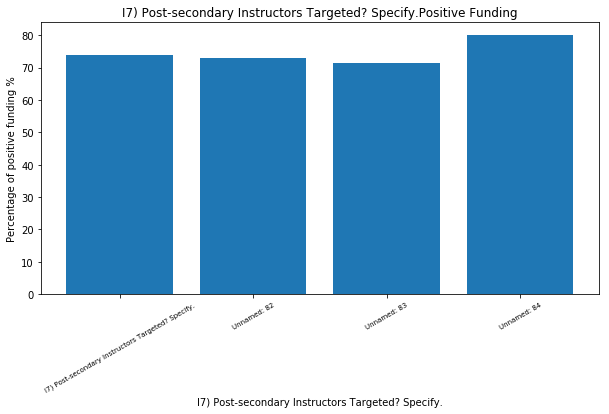

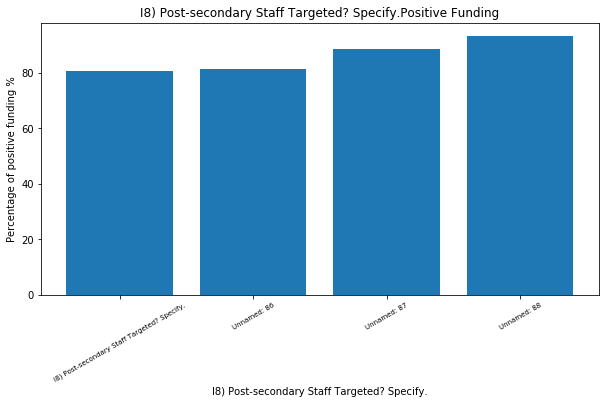

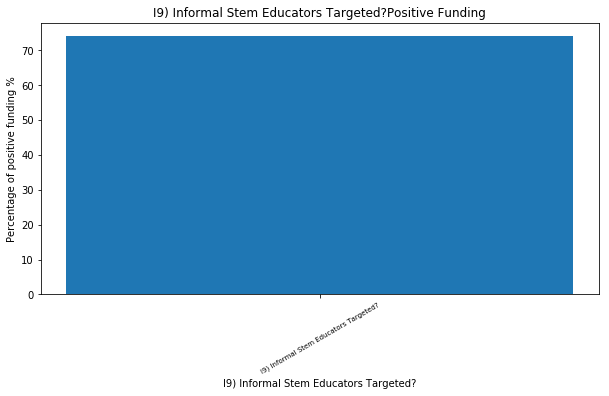

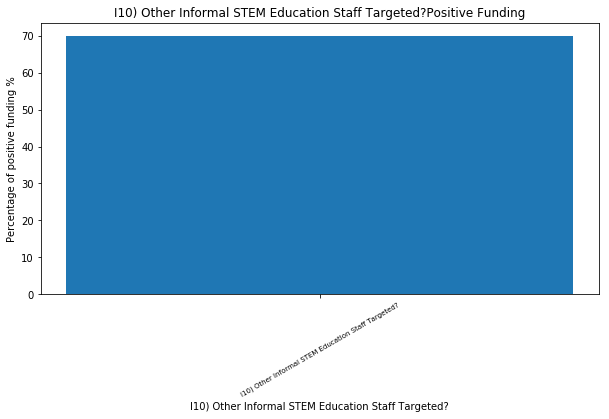

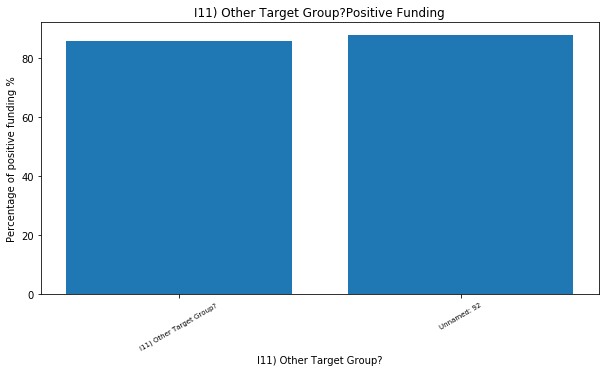

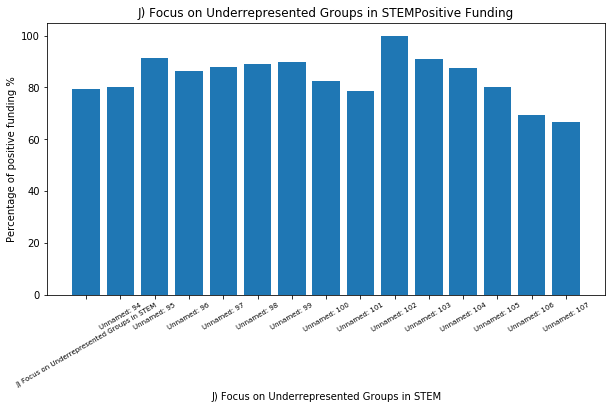

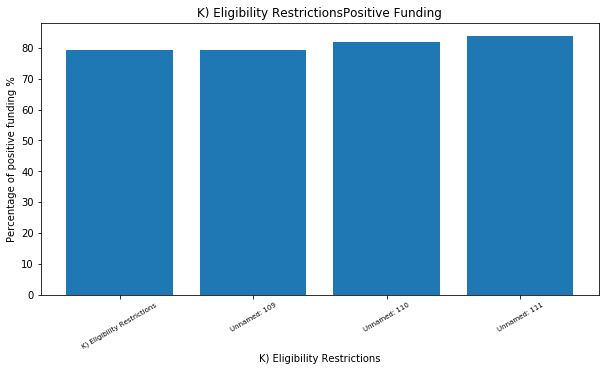

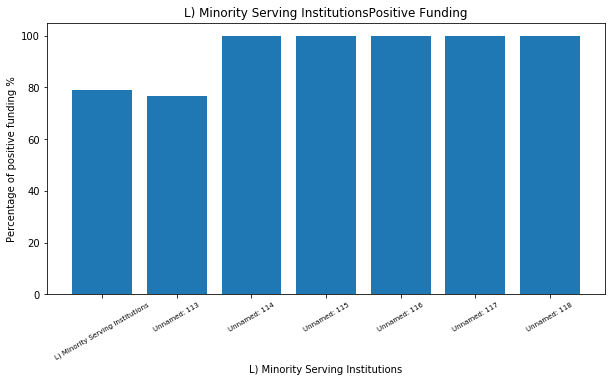

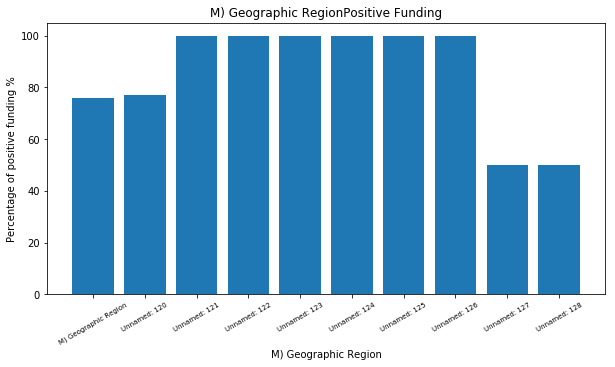

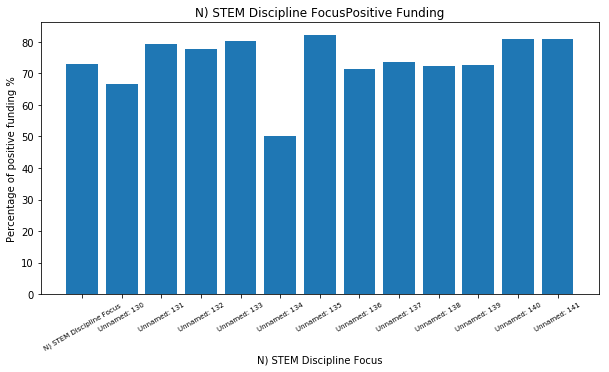

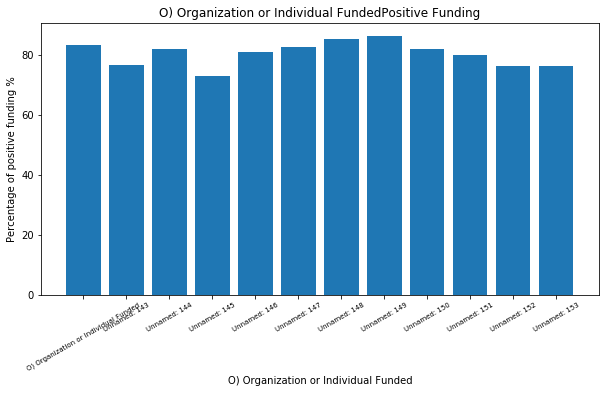

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars


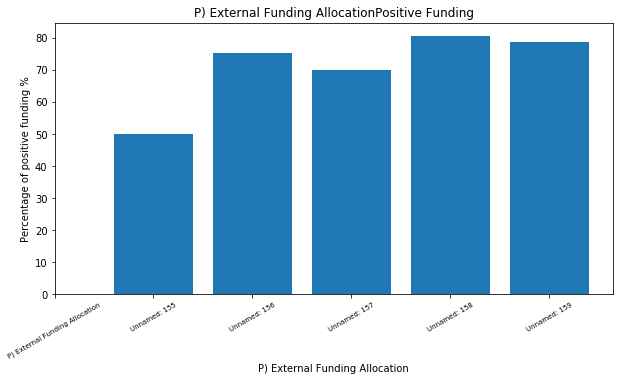

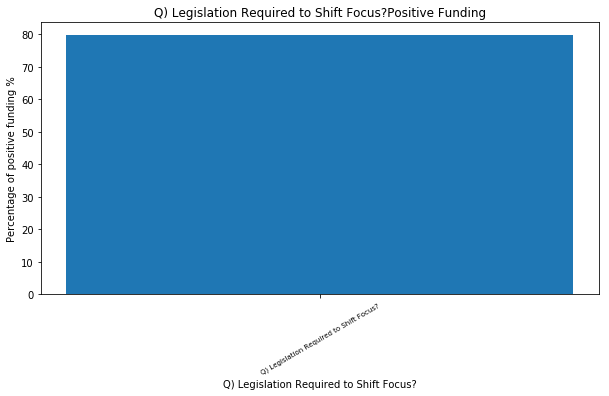

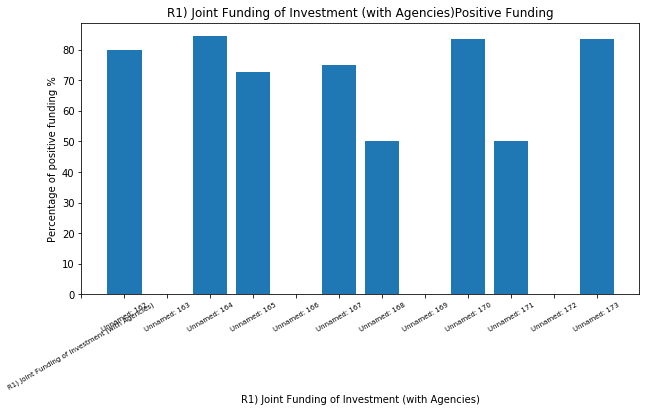

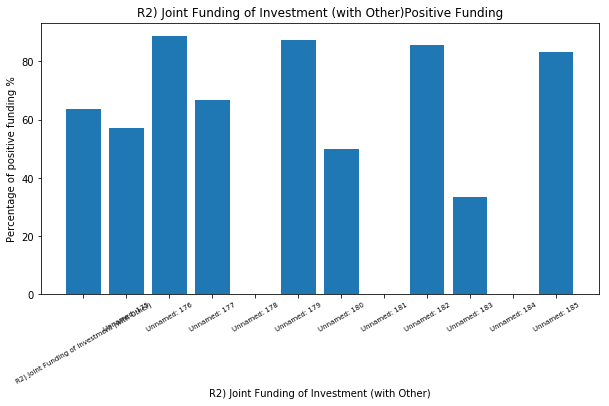

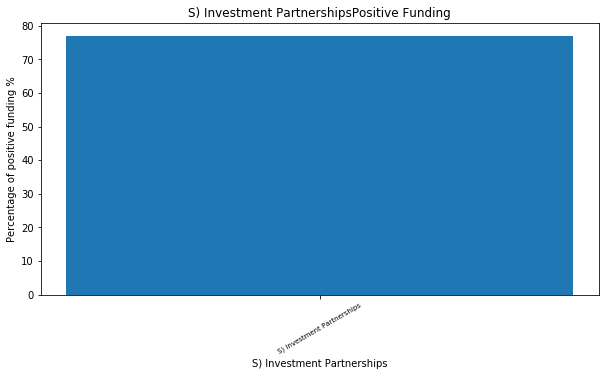

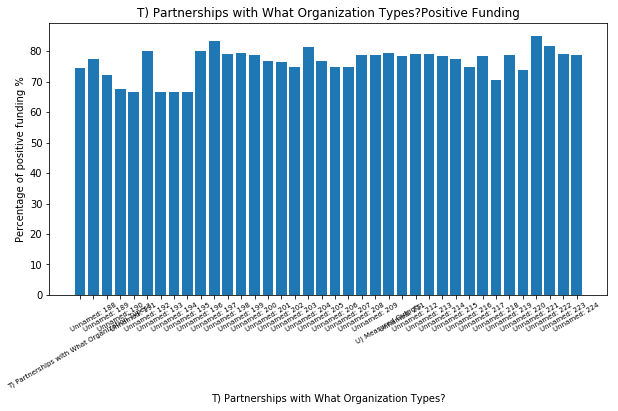

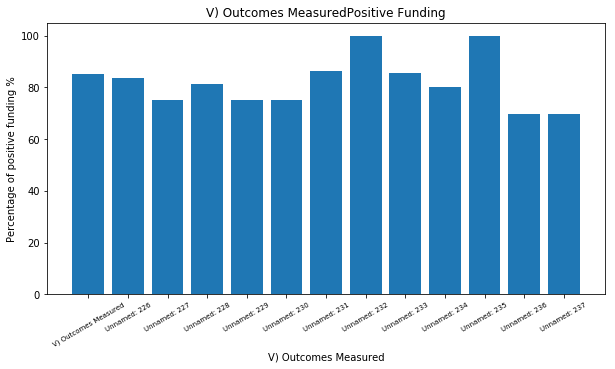

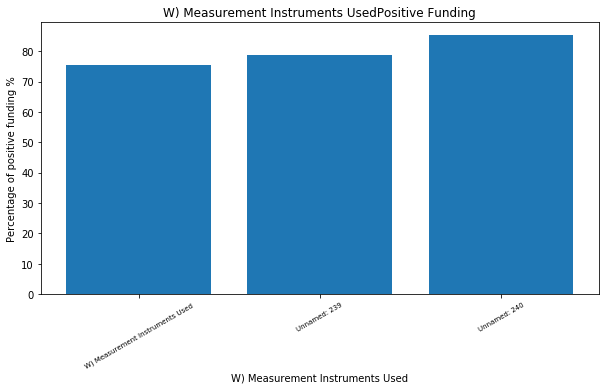

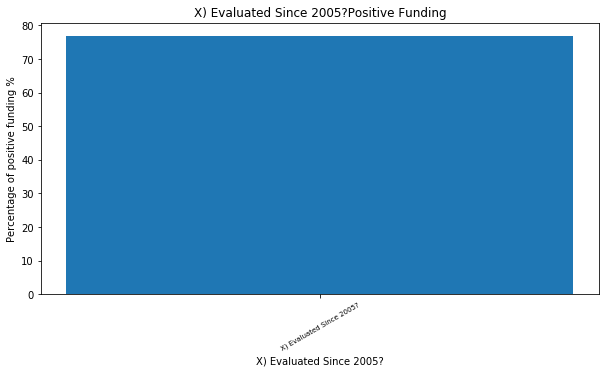

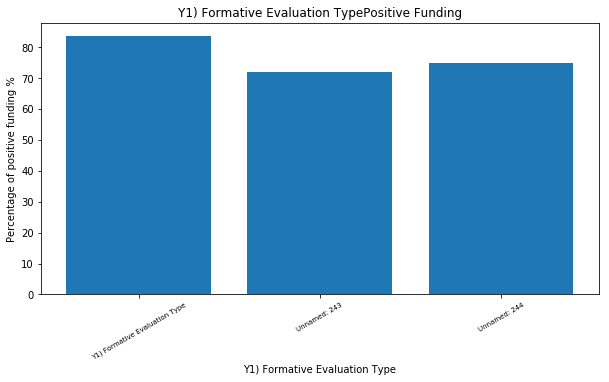

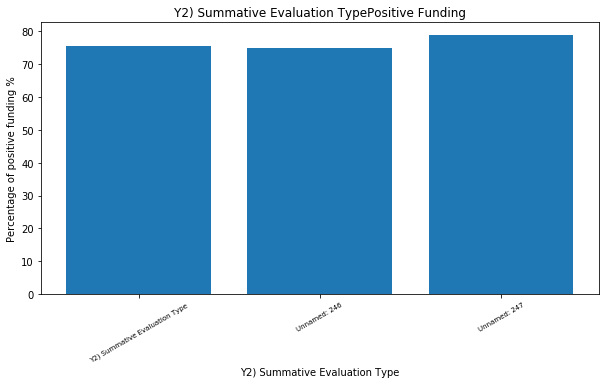

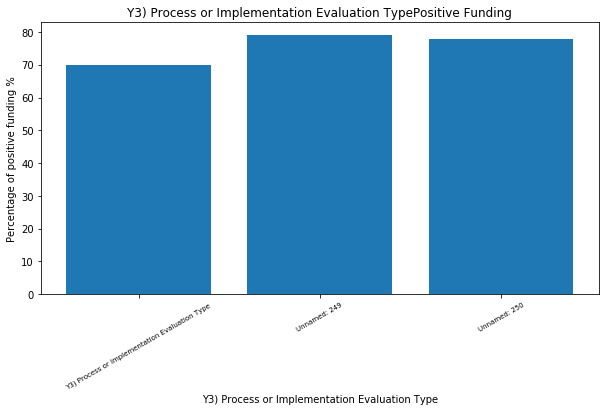

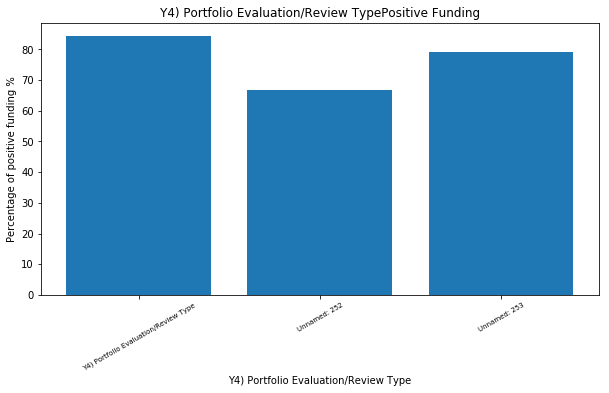

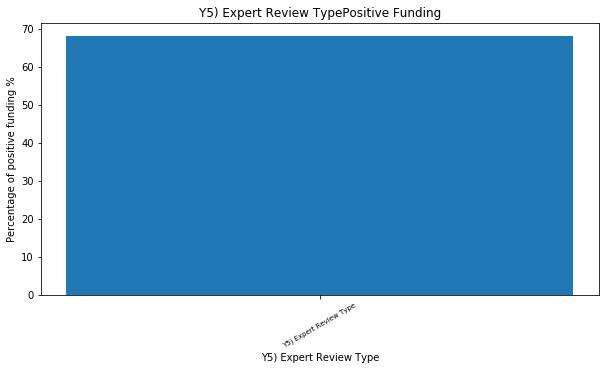

In [11]:
i = 14
# df.iloc[:,14].isnull().sum()
while(i<len(df.iloc[0,:])-1):
    empty_values_colwise = []
    sums_colwise = []
    columns_name = []
    percentage = []
    start = i
    if(df.columns[i][0]!='U'):
        x = 1
        while((df.columns[i][0]=='U' or x==1 ) and i<len(df.iloc[0,:])-1):
                sum = 0
                x = 0
                empty_values_colwise.append(df.iloc[:,i].isnull().sum())
                for j in range(0,(len(df))):
                    if(type(df.iloc[j,i])==str):
                        sum = sum + df.iloc[j,9]
                sums_colwise.append(sum)
                percentage.append((sum/(len(df) - empty_values_colwise[i-start]))*100)
                columns_name.append(df.columns[i])
                i = i+1
        plot_bar_x(columns_name,percentage,columns_name[0],'Percentage of positive funding %',columns_name[0] + 'Positive Funding')

## Correlation of features by using heatmap

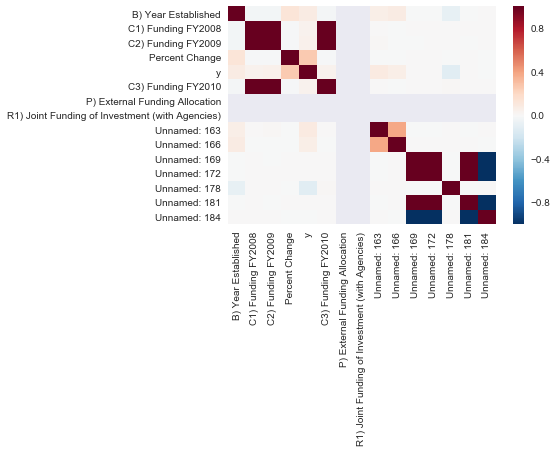

In [54]:
sns.heatmap(df.corr())

## Dividing the data into train & test samples. (70-30 split)

In [37]:
from sklearn.cross_validation import train_test_split
df.fillna(df.mean(),inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'B) Year Established':'C3) Funding FY2010'], df['y'], test_size = 0.3, random_state = 0)
X_train.drop(['y','Percent Change'], axis = 1, inplace = True)
X_test.drop(['y','Percent Change'], axis = 1, inplace = True)


## Import xgboost and Losgistic Regression

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Training the xgboost model and printing the accuracy obtained

In [49]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(y_pred,y_test)

Accuracy: 75.00%


# Training the Logistic model and printing the accuracy obtained (Higher than xgboost)



In [48]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(y_pred,y_test)

Accuracy: 80.26%
